In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.head(3)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York


# Creating Visualizations for Data Analysis

Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year

In [30]:
price_year =df.groupby(["Year"]).mean()
price_year = price_year["Automobile_Sales"]

Text(0.5, 0, 'Years')

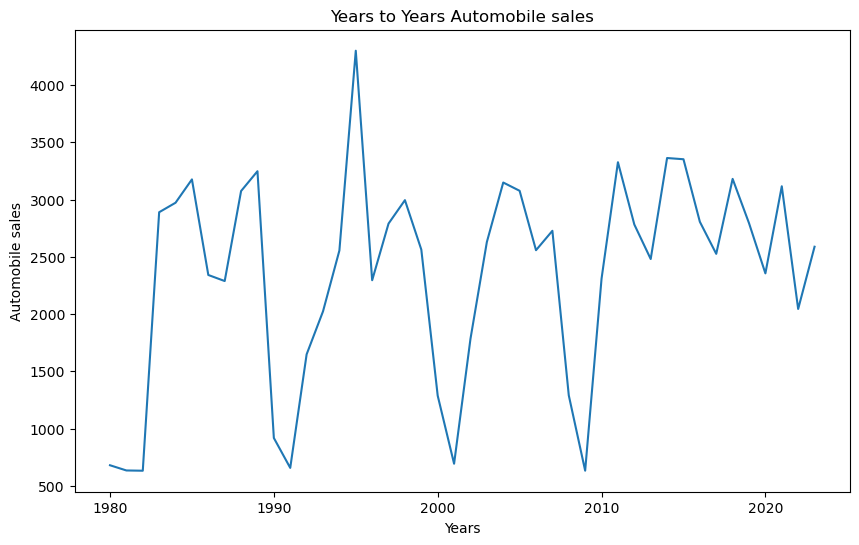

In [32]:
plt.figure(figsize=(10, 6))
price_year.plot(kind = 'line')
plt.title('Years to Years Automobile sales')
plt.ylabel('Automobile sales')
plt.xlabel('Years')

### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 

In [ ]:
# annotate years of recession. 
# syntax: plt.text(x, y, label)
plt.figure(figsize=(10, 6))
price_year.plot(kind = 'line')
plt.title('Years to Years Automobile sales')
plt.ylabel('Automobile sales')
plt.xlabel('Years')

plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.show()

####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [190]:
recession = df[df["Recession"]==1]
df_Mline = recession.groupby(['Year','Vehicle_Type'], 
                      as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'], 
                      as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Vehicle_Type', inplace=True)

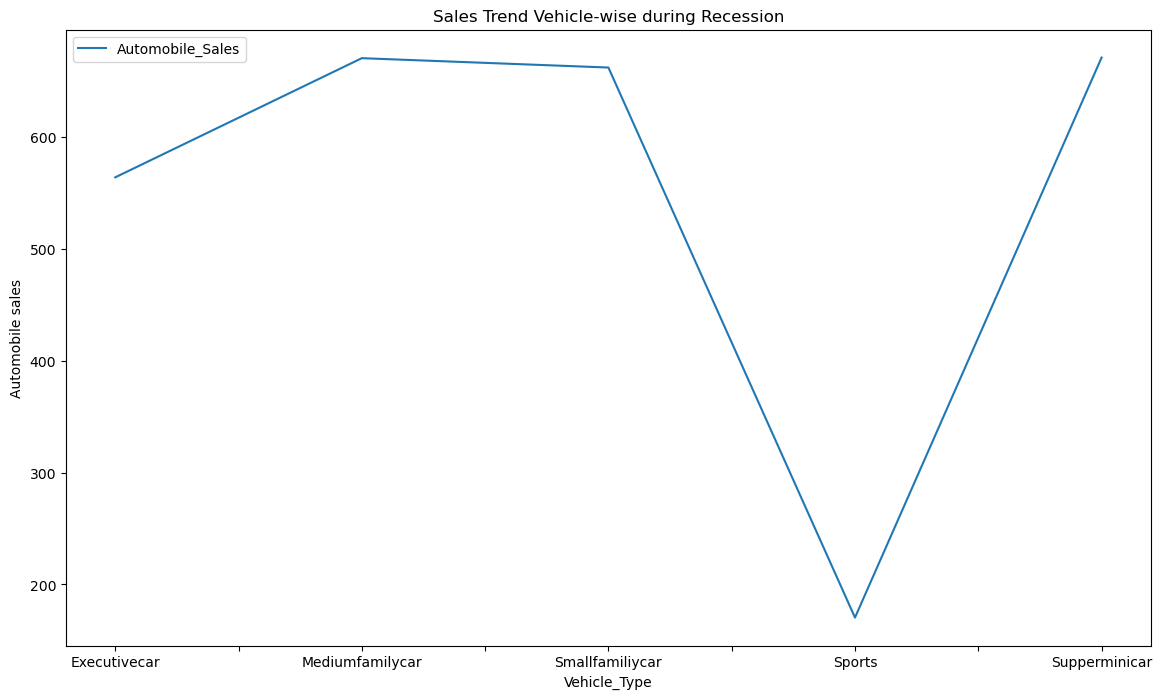

In [192]:
df_Mline.plot(kind="line", figsize=(14, 8))

plt.ylabel('Automobile sales')
plt.xlabel('Vehicle_Type')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

### TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

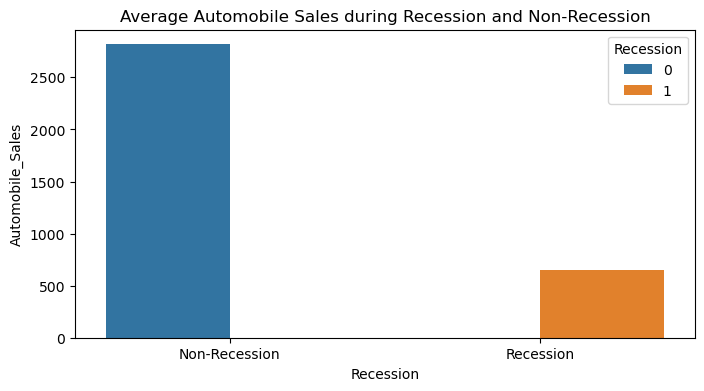

In [209]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Recession', 
            y='Automobile_Sales', 
            hue='Recession',  data=new_df)

plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], 
           labels=['Non-Recession', 'Recession'])
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization

<p>
     To visualize sales of different vehicles during recession and non-recession periods, you can use a bar chart
        <br> You will need to group Recession, Vehicle_Type for average Automobile_Sales and then plot it<br>
    Make use of sns.barplot(x=x,y=y, data = df)</p>


<AxesSubplot:xlabel='Recession', ylabel='Automobile_Sales'>

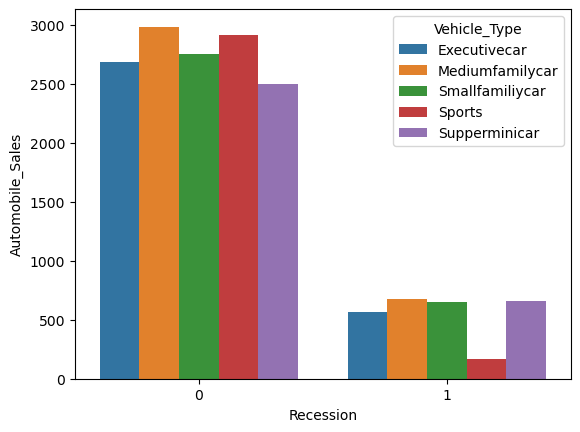

In [221]:
df2 = df.groupby(['Recession',
                  'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()


sns.barplot(x ="Recession", 
            y = "Automobile_Sales",
            hue='Vehicle_Type',
            data = df2)

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

- Find more insights from the data to understand the reason.
- Plot a two line charts using subplotting to answer:-

    - How did the GDP vary over time during recession and non-recession periods?
    - Make use of add_subplot() from Matplotlib for this comparision.

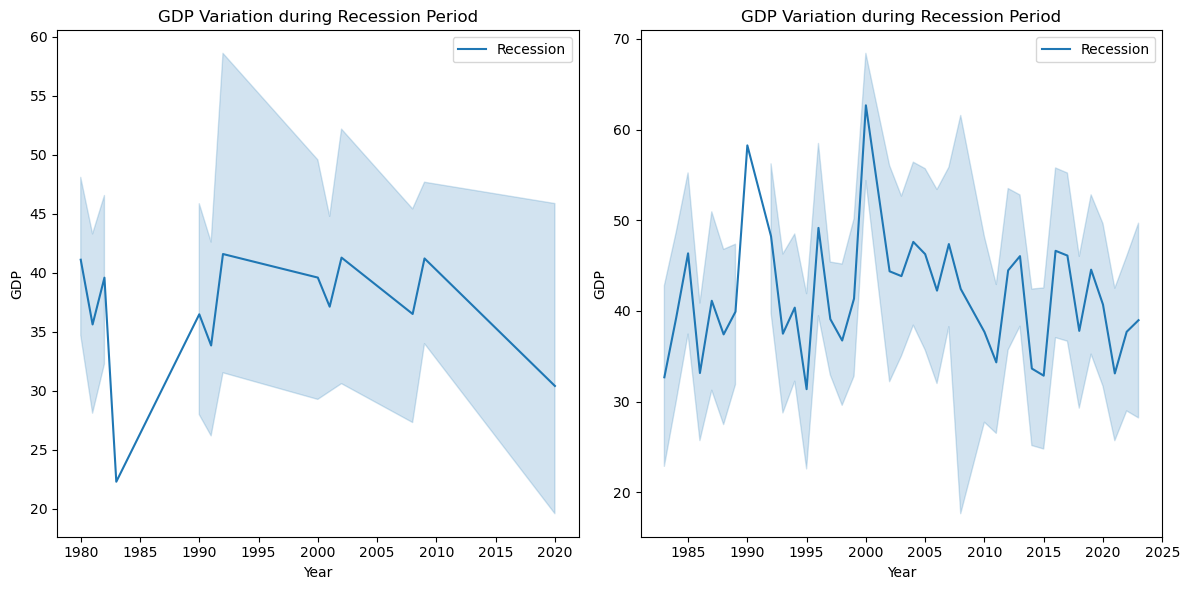

In [271]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # ad

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Recession Period')

plt.tight_layout()
plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'

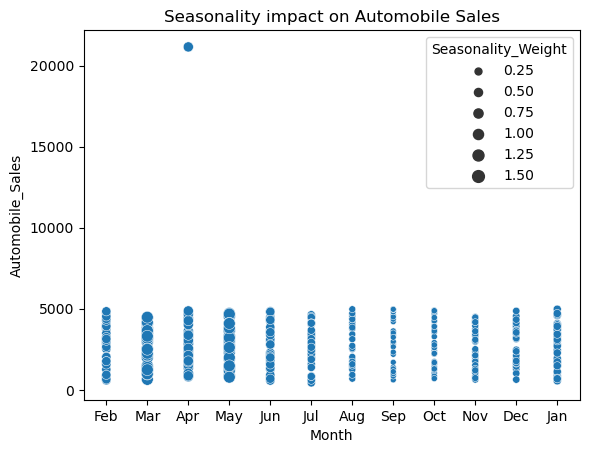

In [279]:
# create Bubble Chart by calling the scatter()
# Pass the 'Month' and 'Automobile_Sales' to the functions 
# as x and y and then use Seasonality weight for size parameter

non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight']


sns.scatterplot(x= "Month",
                y = "Automobile_Sales",
                data = non_rec_data,
                size = size)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'

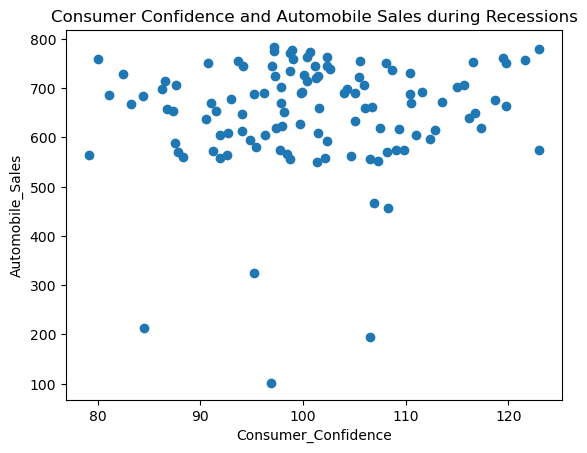

In [282]:

rec_data = df[df['Recession'] == 1]
plt.scatter(x = 'Consumer_Confidence', 
            y = 'Automobile_Sales',
           data = rec_data)

plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

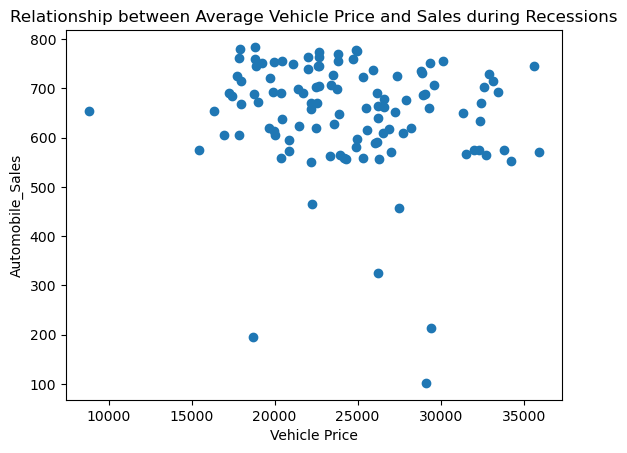

In [284]:

rec_data = df[df['Recession'] == 1]
plt.scatter(x = 'Price', 
            y = 'Automobile_Sales',
           data = rec_data)

plt.xlabel('Vehicle Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 

In [285]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

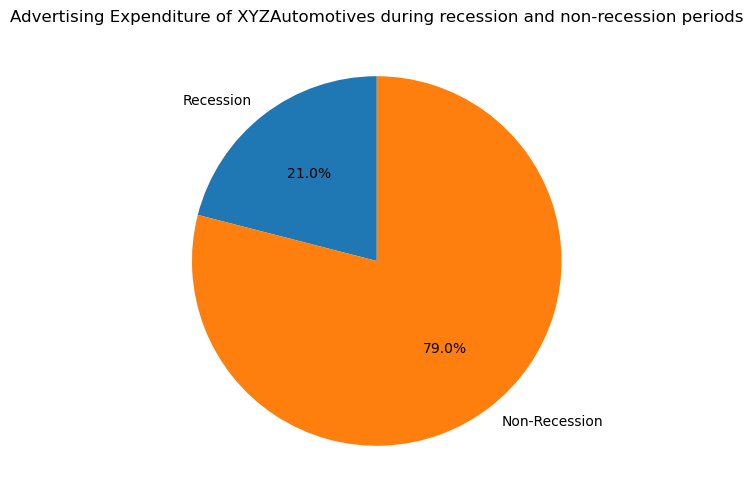

In [288]:
# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure of XYZAutomotives during recession and non-recession periods')

plt.show()

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 

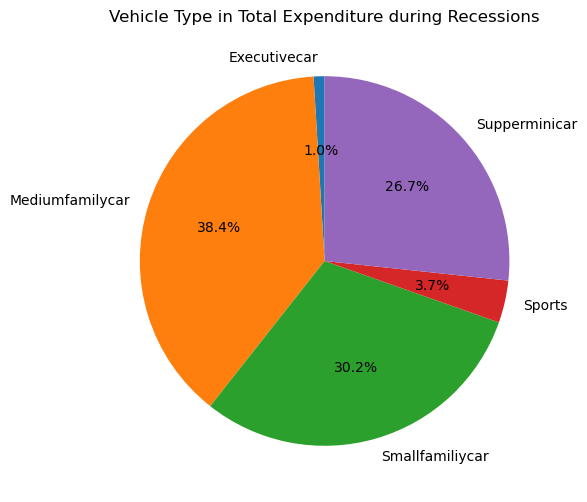

In [293]:
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(10,6))

labels = VTexpenditure.index #Vehicle_Type
sizes = VTexpenditure.values # Advertising_Expenditure

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)    
plt.title('Vehicle Type in Total Expenditure during Recessions')

plt.show() 

 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


In [294]:
df.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


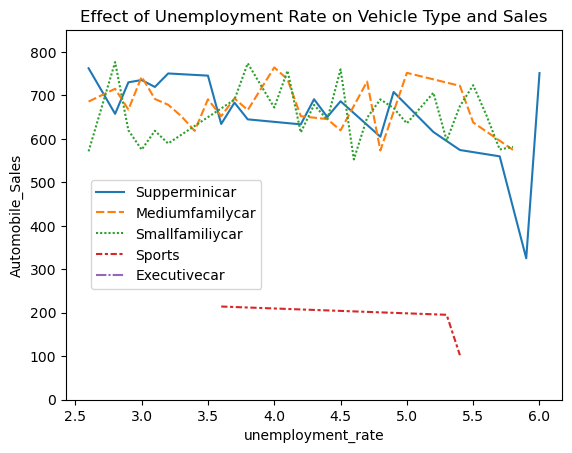

In [298]:
df_rec = df[df['Recession']==1]

sns.lineplot(data=df_rec, 
             x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', 
             style='Vehicle_Type', 
             err_style=None)

plt.ylim(0,850)
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.legend(loc=(0.05,.3))

### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [309]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

